# EDA on Lending club dataset to derive insights on which type of loans have a greater risk of defaulting

### Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns

### Due to huge number of columns and rows, setting defaults to view all columns and rows

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

### Loading dataset

In [3]:
data_loc='/Users/arijitsengupta/Documents/Education/ML AI/Assignments/Lending Club Case Study/loan.csv'
loans=pd.read_csv(data_loc, low_memory=False)

### Veiwing the rows, columns, data types for better understanding

In [4]:
loans.info(max_cols=120)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

### Checking for columns with Null Values

In [5]:
loans.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


### There are lot of column with 39000+ Null values. Since they add no value to our analysis removing them 

In [6]:
loans01=loans[loans.columns[~(loans.isnull().sum()>35000)]].copy()

### Rechecking Null values after 1st Drop operation

In [7]:
loans01.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

### Imputing remaining columns with Null Values

### mths_since_last_delinq has 25000+ null values and this column might be needed in analysis later hence will be imputing the null values

<Axes: >

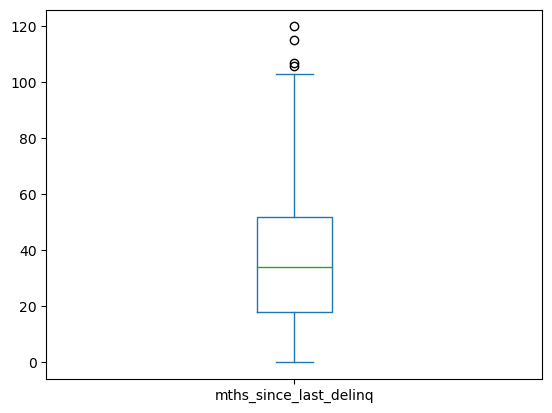

In [8]:
loans01.mths_since_last_delinq.plot.box()

In [9]:
# There are outliers above 100 hence veiwing the data distribution for values below 100
# Checking the spread of data below 100
loans01[loans01['mths_since_last_delinq'] <= 100]['mths_since_last_delinq'].describe()

count    14029.000000
mean        35.869698
std         21.972408
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max         97.000000
Name: mths_since_last_delinq, dtype: float64

In [10]:
# Since 75% of the data seems to be clustered below 52 hence taking the median to fill up the null values 
mid_fill=loans01[loans01['mths_since_last_delinq'] <= 100]['mths_since_last_delinq'].median()

In [11]:
loans01.mths_since_last_delinq.fillna(mid_fill,inplace=True)

In [12]:
loans01.mths_since_last_delinq.isnull().sum()

0

### desc column has 12000 + null values.Checking on the contents

#### desc columns is a detailed note on purpose of loan. We have anothe purpose column already hence dropping desc column

In [ ]:
#filling null values with random data as,
#without this operation Jupyter notebook keeps crashing when trying to drop the column
loans01.desc.fillna('drop')

In [ ]:
loans01.drop('desc', axis=1, inplace=True)

### emp_title has more than 2000 null values. Inspecting the data

In [ ]:
# emp_title is the employer name. Checking to see if there are clusters
loans01.emp_title.head()

In [ ]:
# Employer details might help with multivariate analysis later on, hence imputing null values with "Others"
loans01.emp_title.fillna('Others',inplace=True)

In [ ]:
loans01.emp_title.isnull().sum()

0

### emp_length has more than 1000 null values. Inspecting emp_title data

In [ ]:
loans01.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

### emp_length can act as both categorical as well as quantitative. We have enough data data to represent all the categories, and imputing them with mean or median will increase one of the categories drastically in proportion to other buckets. Hence removing all nan values

In [19]:
loans01=loans01[~loans01['emp_length'].isnull()]

### checking current null value counts after above processing

In [20]:
loans01.isnull().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
purpose                         0
title                          10
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
mths_since_last_delinq          0
open_acc                        0
pub_rec       

### pub_rec_bankruptcies has more than 600 null values. Inspecting the column

In [21]:
loans01.pub_rec_bankruptcies.value_counts()

0.0    36375
1.0     1563
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

### Since the values represent the number of publicly known bankruptcies, we will assume Null values to represent no known bankruptcies recorded and fill them with 0.0

In [22]:
#imputing missing values with mode which is 0.0
loans01.pub_rec_bankruptcies.fillna(0.0,inplace=True)

In [23]:
loans01.pub_rec_bankruptcies.isnull().sum()

0

### For the null values in  last_pymnt_d column, we assumed May 2016 to be the latest date when the report was generated and imputed the data by subtracting the number of months in the "mths_since_last_delinq" column for respective values and subtracting it from May 2016

In [24]:
#Converting last_pymnt_d column to datetime series
loans01.last_pymnt_d=pd.to_datetime(loans01['last_pymnt_d'],format='%b-%y').dt.strftime('%b %Y')

In [25]:
#Verifying the latest date available and assuming that the report was pulled in that month
loans01.last_pymnt_d.value_counts()

May 2016    1209
Mar 2013    1001
Dec 2014     911
May 2013     884
Feb 2013     846
Mar 2012     828
Apr 2013     822
Aug 2012     811
Oct 2012     809
Mar 2014     805
Jan 2014     801
Aug 2014     797
Jul 2014     793
Oct 2014     778
Jan 2013     769
Feb 2014     768
Dec 2013     758
Sep 2012     753
Jul 2013     750
Jun 2014     744
Jul 2012     724
Nov 2012     723
Apr 2012     721
Feb 2012     719
May 2012     718
Aug 2013     702
Dec 2012     691
Jun 2012     683
Oct 2013     672
Jun 2013     671
May 2014     659
Sep 2014     658
Sep 2013     655
Apr 2014     653
Nov 2013     646
Nov 2014     560
Jan 2012     534
Dec 2011     528
Mar 2011     475
Nov 2011     441
Sep 2011     440
Oct 2011     438
Aug 2011     423
Apr 2011     411
Jul 2011     385
May 2011     373
Jun 2011     364
Feb 2011     331
Jan 2015     326
Jan 2011     265
Dec 2010     250
Jul 2015     244
Nov 2015     222
Apr 2016     217
Jun 2015     216
Oct 2010     215
Mar 2016     210
Aug 2015     200
Sep 2015     1

In [26]:
#Using mths_since_last_delinq column to impute the last payment date by subtracting it from May 2016
loans01.loc[loans01['last_pymnt_d'].isnull(), 'mths_since_last_delinq']

26       34.0
2724     34.0
3613     25.0
3985     34.0
4206     34.0
4803     34.0
5716     34.0
6253      9.0
6259     34.0
6768     34.0
6943     34.0
6967     58.0
7137     64.0
8429     52.0
8707     34.0
10175    34.0
11051    34.0
11468    34.0
11523    34.0
11703    13.0
11860    52.0
12026    35.0
12739    40.0
13661    34.0
13891    34.0
13969    34.0
14220    34.0
14642    16.0
14871    29.0
16301    34.0
16325    34.0
17913     7.0
18037    34.0
18216    34.0
18316    37.0
18332    34.0
22998    34.0
24469    46.0
24779    34.0
24881    34.0
26775    34.0
27644    23.0
28155    34.0
28685    74.0
29635    40.0
30297    13.0
31206    34.0
31359    34.0
32322    34.0
32378    34.0
32593    35.0
32760    10.0
32967    34.0
33567    34.0
34177    34.0
34217    34.0
34237    34.0
34420    34.0
34438    34.0
35143    34.0
35186    21.0
36185    34.0
36206    34.0
36209    34.0
36937    50.0
37911    10.0
Name: mths_since_last_delinq, dtype: float64

In [27]:
#Setting reference date as May 2016 assuming that is when the report was pulled
date_reference = pd.to_datetime("May 2016")

In [28]:
#loans01.loc[loans01['last_pymnt_d'].isnull(), 'last_pymnt_d'] = date_reference - pd.DateOffset(months=loans01.loc[loans01['last_pymnt_d'].isnull(), 'mths_since_last_delinq'])
loans01.loc[loans01['last_pymnt_d'].isnull(), 'last_pymnt_d'] = loans01.loc[loans01['last_pymnt_d'].isnull(), 'mths_since_last_delinq'].apply(lambda x: date_reference - pd.DateOffset(months=x))

In [29]:
loans01.last_pymnt_d.isnull().sum()

0

### Dropping the below columns as we dont see much use for them in our analysis for deriving insights on Bad Loans

In [30]:
#Dropping below columns as they dont seem to be contributing much to deriving insights
drop_list=['id','member_id','funded_amnt_inv','url','zip_code',
'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','chargeoff_within_12_mths',
'collections_12_mths_ex_med','tax_liens','last_credit_pull_d']

loans01.drop(columns=drop_list,inplace=True,axis=1)


### Final columns after data clean up

In [31]:
loans01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38642 non-null  int64  
 1   funded_amnt             38642 non-null  int64  
 2   term                    38642 non-null  object 
 3   int_rate                38642 non-null  object 
 4   installment             38642 non-null  float64
 5   grade                   38642 non-null  object 
 6   sub_grade               38642 non-null  object 
 7   emp_title               38642 non-null  object 
 8   emp_length              38642 non-null  object 
 9   home_ownership          38642 non-null  object 
 10  annual_inc              38642 non-null  float64
 11  verification_status     38642 non-null  object 
 12  issue_d                 38642 non-null  object 
 13  loan_status             38642 non-null  object 
 14  pymnt_plan              38642 non-null

### Binning Continuous features:

In [32]:
#Removing the % sign and converting to numeric for conducting quantitative analysis
loans01.int_rate=pd.to_numeric(loans01.int_rate.str.replace('%',''))

loans01['loan_status_stat'] = loans01['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

#Removing the % sign and converting to numeric for conducting quantitative analysis
loans01.emp_length=pd.to_numeric(loans01.emp_length.str.replace('[^\d.]', '', regex=True))

loans01['LP_Month'] = pd.to_datetime(loans01['last_pymnt_d']).dt.month
loans01['LP_Year'] = pd.to_datetime(loans01['last_pymnt_d']).dt.year

# create bins for loan_amnt range
bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
bucket_l = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
loans01['loan_amnt_range'] = pd.cut(loans01['loan_amnt'], bins, labels=bucket_l)
loans01['funded_amnt_range'] = pd.cut(loans01['funded_amnt'], bins, labels=bucket_l)

#create bins for interest rate
bins = [0,7.5,10, 12.5, 15, 30]
bucket_i = ['0-7.5', '7.5-10','10-12.5','12.5-15','15+']
loans01['int_rate_range']  = pd.cut(loans01['int_rate'],bins,bucket_i)

#create bins for annual income
bins = [0, 25000, 50000, 75000, 100000, 1000000]
bucket_l = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
loans01['annual_inc_range'] = pd.cut(loans01['annual_inc'], bins, labels=bucket_l)


# create bins for dti range
bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
bucket_d = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
loans01['dti_range'] = pd.cut(loans01['dti'], bins, labels=bucket_d)

#Since we are interested in patterns that lead to bad loans, removing all Ongoing loans as they will not be of any help here
loans01=loans01[~(loans01.loan_status== 'Current')]

#loans01['loan_status_stat'] = loans01['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

## Univariate  & Bivariate Analysis

### Loan Amount 

<Axes: >

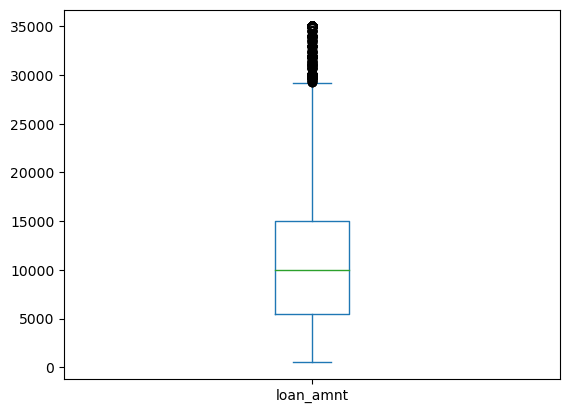

In [33]:
loans01.loan_amnt.plot.box()

### 75% of the Loans are in the range of 15000 and below. Plotting the spread above and below the 75th percentile (15000)

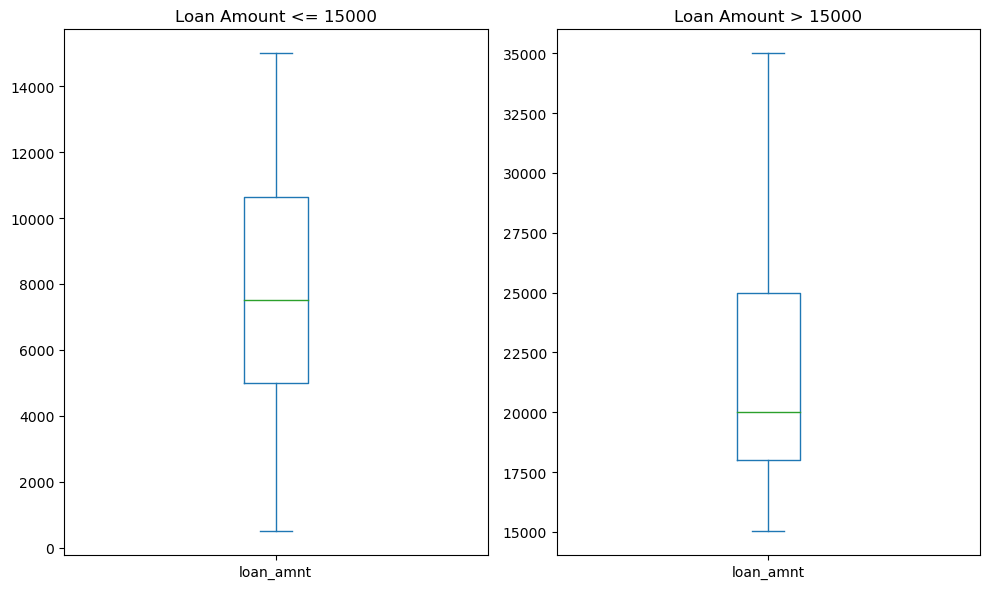

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

loans01[loans01['loan_amnt'] <= 15000]['loan_amnt'].plot.box(ax=axes[0])
axes[0].set_title('Loan Amount <= 15000')

loans01[loans01['loan_amnt'] > 15000]['loan_amnt'].plot.box(ax=axes[1])
axes[1].set_title('Loan Amount > 15000')

plt.tight_layout()
plt.show()

### Loan amount requested and funded

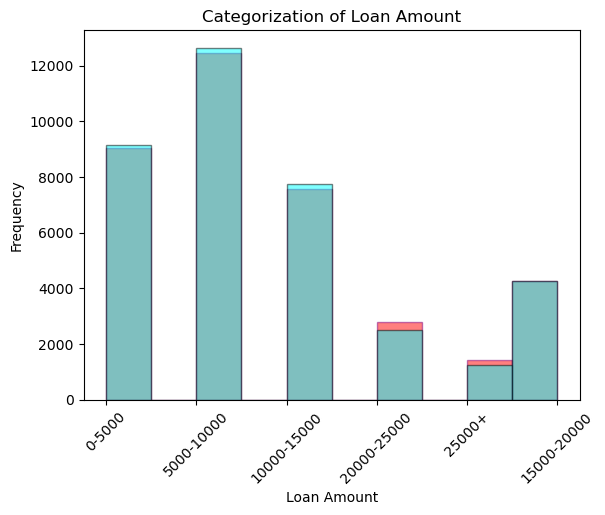

In [35]:
plt.hist(loans01.loan_amnt_range, edgecolor='purple', alpha=0.5,color='red', label='Loan Amount')
plt.hist(loans01.funded_amnt_range, edgecolor='black', alpha=0.5,color='cyan', label='Funded Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Categorization of Loan Amount')
plt.xticks(rotation=45)
plt.show()

### We gather that loan amounts have a very high density within the 20000 mark with the highest amount of loans in the 8000-10000 region. The trend also shows that in most cases the total Loan amount requested was funded. We do see few cases on the higher end of the Loan mount spectrum where Funded amount is less than loan amount

# ----------------------------------------


### Lets take a look at the spread of our target variable loan_status

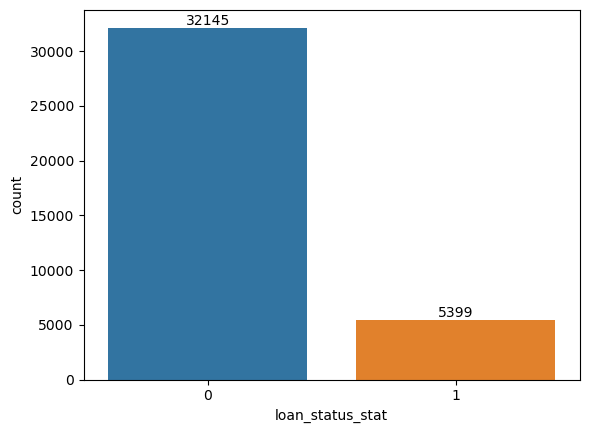

In [36]:
#loans01['loan_status_stat'] = loans01['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
ax=sns.countplot(x="loan_status_stat", data=loans01)
ax.bar_label(ax.containers[0])
plt.show()





#### ---------------------------------------------------------------------





### Taking a look at the loan term data to identify patterns if any

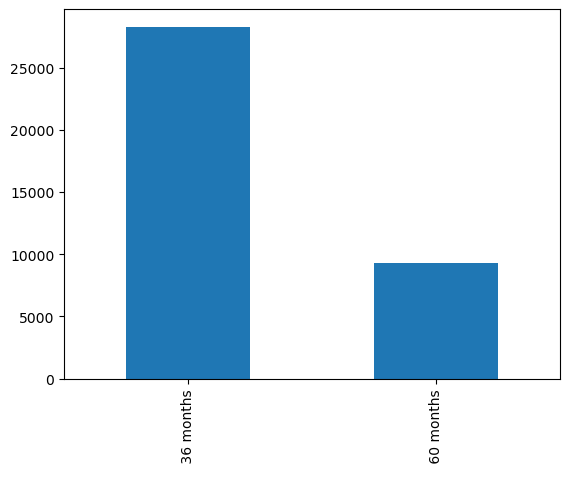

In [37]:
loans01.term.value_counts().plot.bar()
plt.show()

### There are just 2 term options of either 36 months or 60 months. On plotting them there doesnt seem to be much of a relation between the Loan term and Loan amount

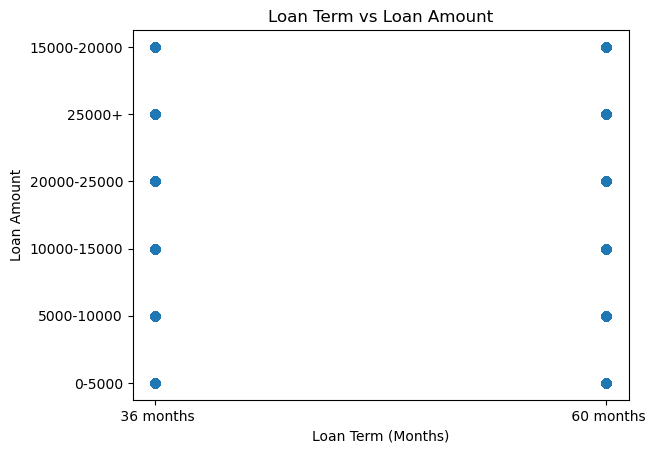

In [38]:
plt.scatter(loans01['term'], loans01['loan_amnt_range'])
plt.xlabel('Loan Term (Months)')
plt.ylabel('Loan Amount')
plt.title('Loan Term vs Loan Amount')
plt.show()

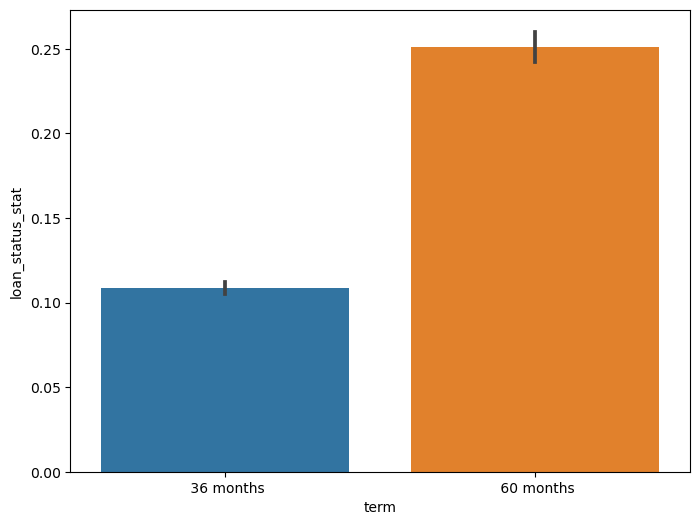

In [39]:
# term vs Defaulter

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x='term', y='loan_status_stat', data=loans01)

plt.show()

### From above plot we can say that the defaulters rate is higher for "60 months" term

### Moving onward to Loan interest rate and loan term to derive any insights they provide

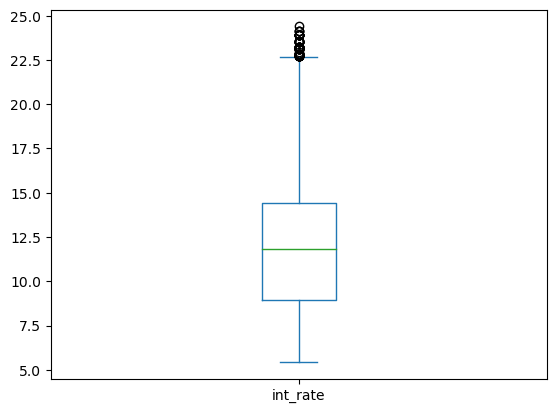

In [40]:
loans01.int_rate.plot.box()
plt.show()

### Interest rates have a higher density on the lower end with median at around 12%,  the minimum rate being 5.42% and max being 24% and 75% of the loans have a interest rate below 14.6%.
### When compared to installment amount, we see a direct correlation between interest rate and installment amount which is a natural effect

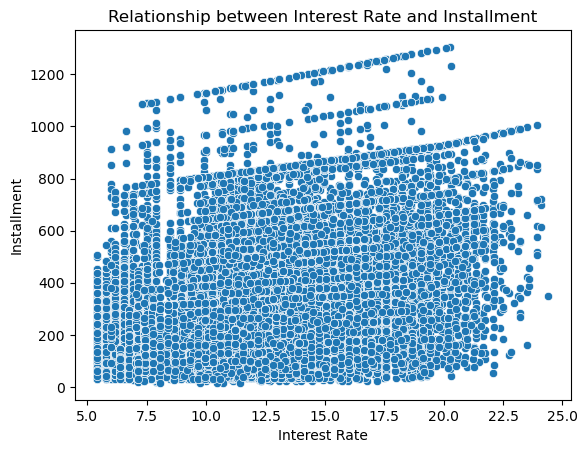

In [41]:
sns.scatterplot(data=loans01, x='int_rate', y='installment')
plt.xlabel('Interest Rate')
plt.ylabel('Installment')
plt.title('Relationship between Interest Rate and Installment')
plt.show()

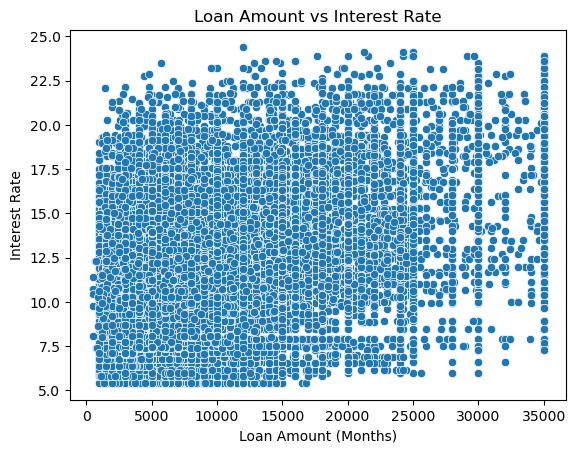

In [42]:
#Analysing to see whether there is any relation between loan term and interest rate
sns.scatterplot(data=loans01, x='loan_amnt', y='int_rate')
plt.xlabel('Loan Amount (Months)')
plt.ylabel('Interest Rate')
plt.title('Loan Amount vs Interest Rate')
plt.show()


### Loan amount vs Interest rate: There seems to be a pattern but no significant insights

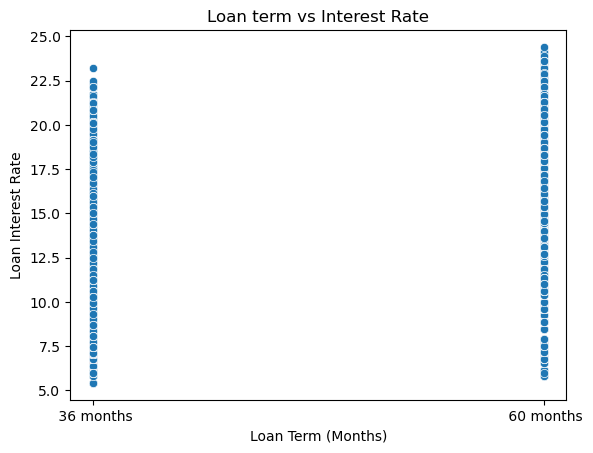

In [95]:
#Analysing to see whether there is any relation between term and interest rate

sns.scatterplot(data=loans01, x='term', y='int_rate')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Loan Interest Rate')
plt.title('Loan term vs Interest Rate')
plt.show()

### There is a very small difference in interest rates where the higher term had higher interest rate but since the difference is very small we can ignore this pattern

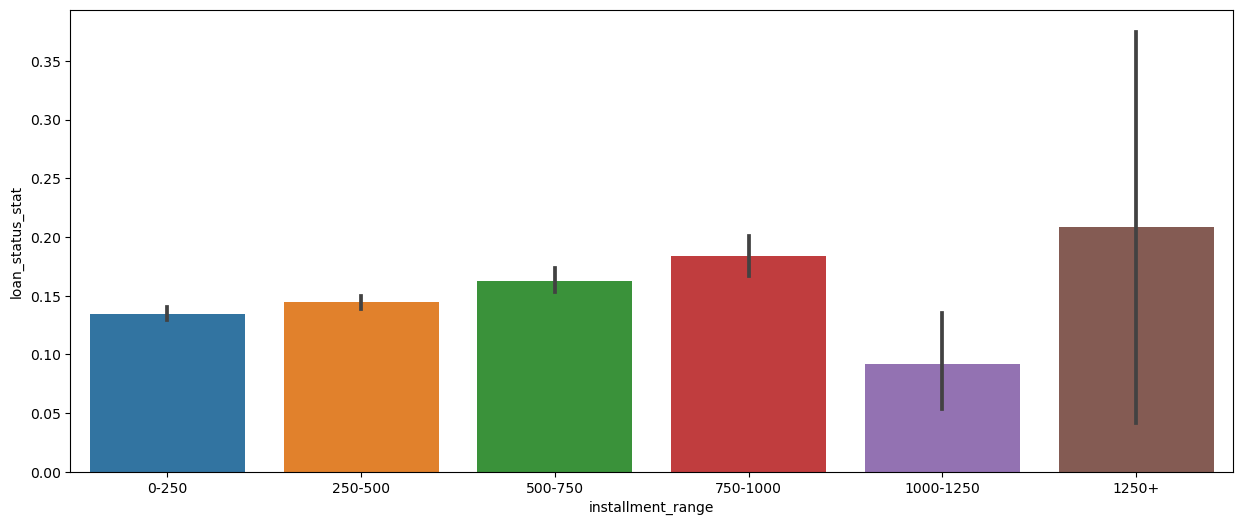

In [44]:
# installment vas Defaulter

bins = [0, 250, 500, 750, 1000, 1250, 1500]
bucket_d = ['0-250', '250-500', '500-750', '750-1000', '1000-1250', '1250+']
loans01['installment_range'] = pd.cut(loans01['installment'], bins, labels=bucket_d)

fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='installment_range', y='loan_status_stat', data=loans01)
#bank['installment'].max()
#plt.show()

### From above plot we can say that the defaulters rate has a positive trend where Loan defaults rise as the Installment amount rises

###


### Taking a look at Grade and Sub-Grade and their relation if any to Loan amount or interest rate


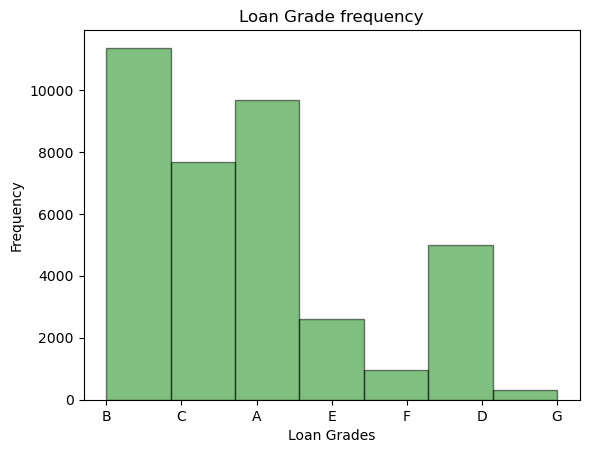

In [45]:
plt.hist(loans01.grade,bins=7,edgecolor='black', alpha=0.5,color='green', label='grade')
plt.xlabel('Loan Grades')
plt.ylabel('Frequency')
plt.title('Loan Grade frequency')
plt.show()

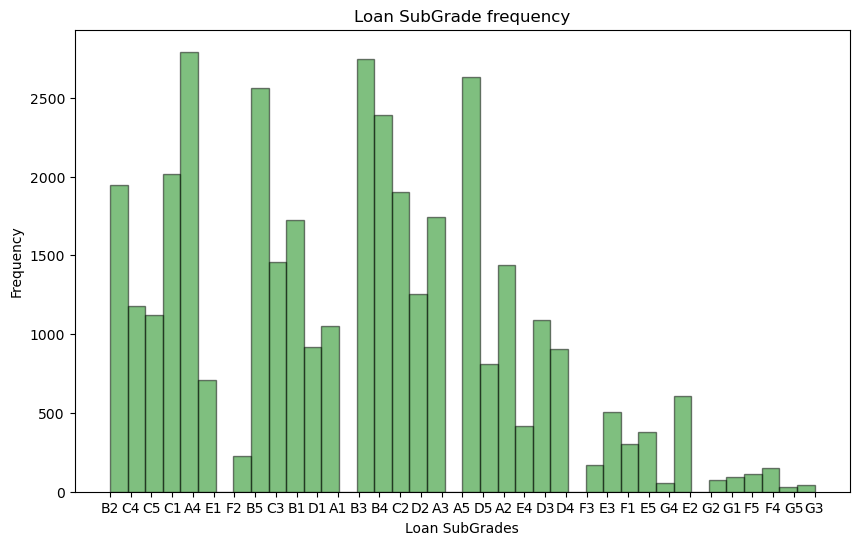

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(loans01.sub_grade,bins=40,edgecolor='black', alpha=0.5,color='green', label='sub-grade')
plt.xlabel('Loan SubGrades')
plt.ylabel('Frequency')
plt.title('Loan SubGrade frequency')
plt.show()

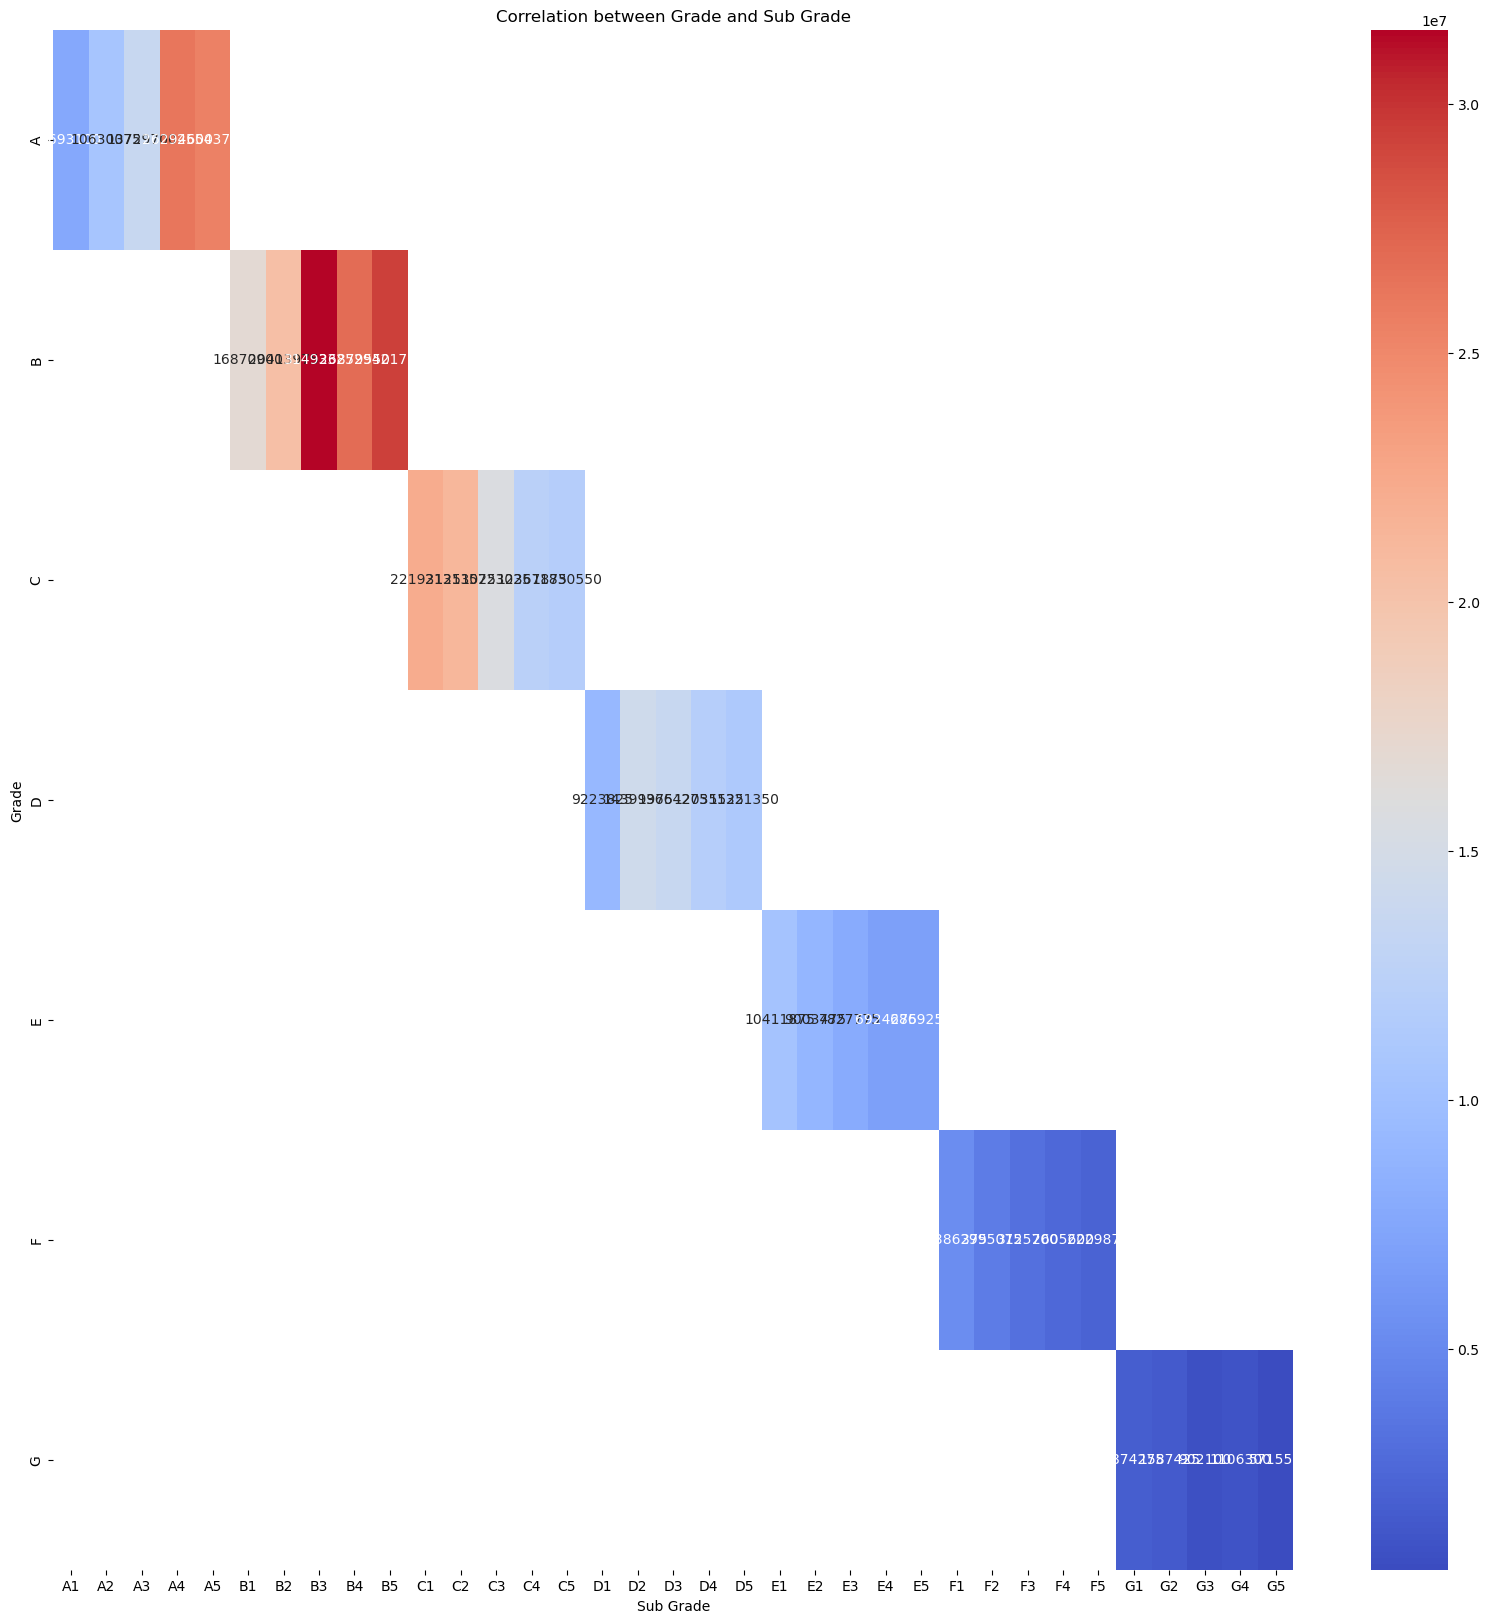

In [47]:
cross_tab = pd.crosstab(loans01['grade'], loans01['sub_grade'], values=loans01.loan_amnt, aggfunc='sum')
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(cross_tab, cmap='coolwarm', annot=True, fmt='.0f', ax=ax)
plt.xlabel('Sub Grade')
plt.ylabel('Grade')
plt.title('Correlation between Grade and Sub Grade')
plt.show()

### It is clear the Grades B, A, C, D have the highest amount of loans and in particular subgrade B3, B5, B4 and B2 constituting the most loan amounts

##




### Analysing emp_length and their affect on Loan Status

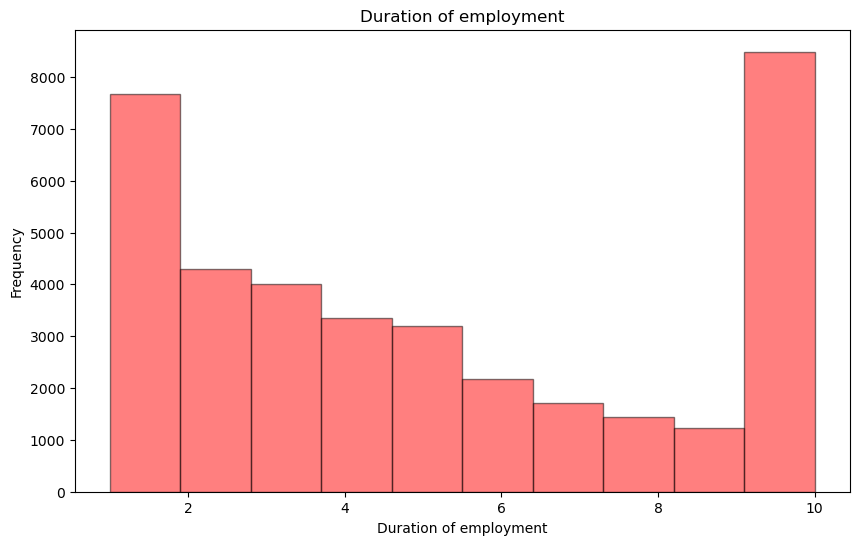

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(loans01.emp_length,bins=10,edgecolor='black', alpha=0.5,color='red', label='Employer')
plt.xlabel('Duration of employment')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.title('Duration of employment')
plt.show()

### Borrowers with Empoyment history of 10 years and above are the highest, closely followed by borrowers with a year or less of employment history.

### Lets see if emploment length has any correlation to Bad Loans

In [49]:
loans01.loan_status_stat.value_counts()

0    32145
1     5399
Name: loan_status_stat, dtype: int64

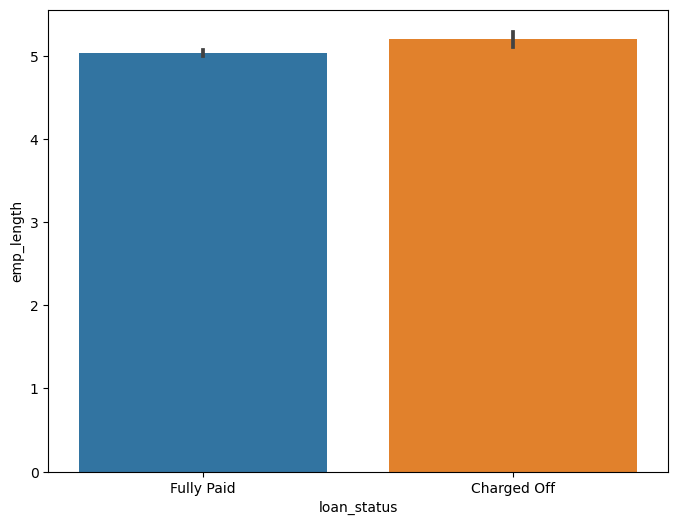

In [50]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x='loan_status', y='emp_length', data=loans01)
plt.show(fig)

### No significant insights are seen between length of employment and Loan defaults

##


### Looking into the home ownership column to derive insights


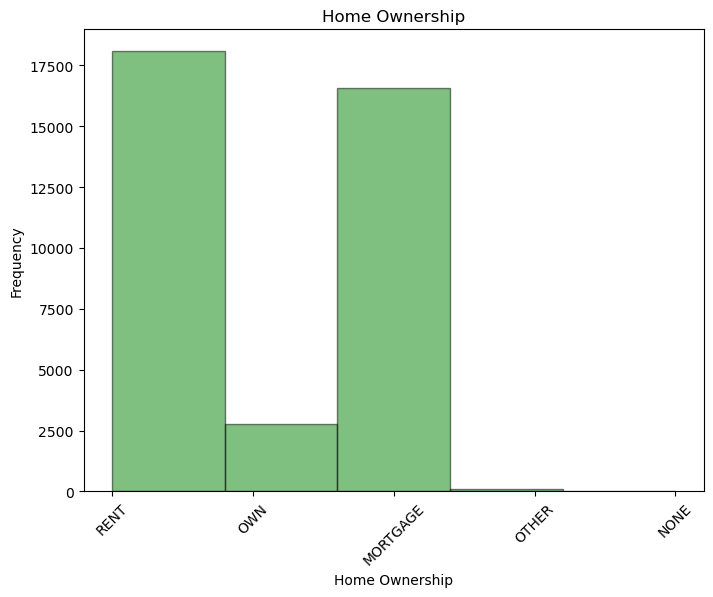

In [51]:
plt.figure(figsize=(8, 6))
plt.hist(loans01.home_ownership,bins=5,edgecolor='black', alpha=0.5,color='green', label='Home Ownership')
plt.xlabel('Home Ownership')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Home Ownership')
plt.show()

### Highest number of borrowers are staying on rented accomodations followed by mortgage.Very few own their Own property

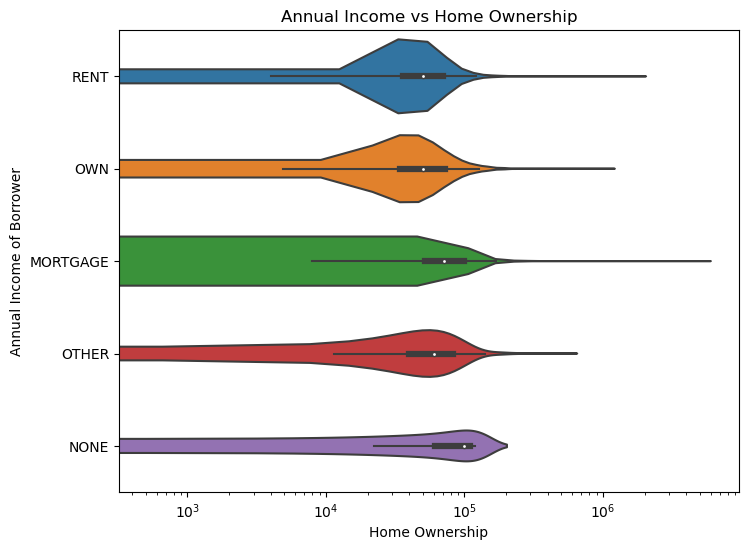

In [96]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=loans01, y='home_ownership', x='annual_inc')
plt.ylabel('Annual Income of Borrower')
plt.xlabel('Home Ownership')
plt.title('Annual Income vs Home Ownership')
plt.xscale('log')
plt.show()


### People with Higher income tend to be on mortgage followed by rented accomodation

MORTGAGE    13.53
NONE          NaN
OTHER       18.37
OWN         14.44
RENT        15.13
Name: home_ownership, dtype: float64


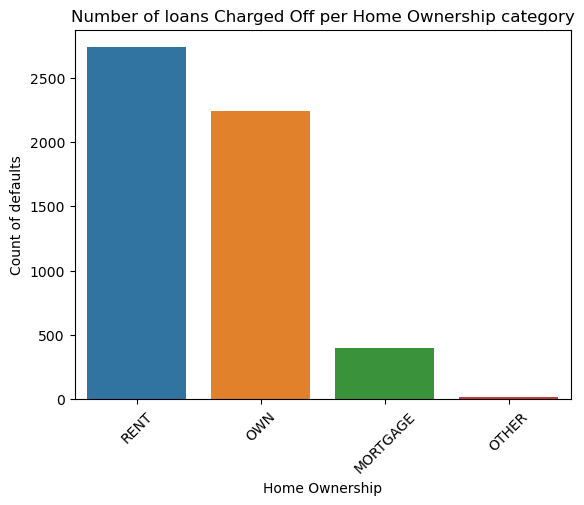

In [97]:
cat1=loans01[loans01['loan_status']== 'Charged Off']['home_ownership'].unique()
val1=loans01[loans01['loan_status']== 'Charged Off']['home_ownership'].value_counts()
val2=loans01.home_ownership.value_counts()
print(round(((val1/val2)*100),2))
sns.barplot(x=cat1, y=val1, data=loans01,errorbar='sd')

# Set labels and title
plt.xlabel('Home Ownership')
plt.ylabel('Count of defaults')
plt.title('Number of loans Charged Off per Home Ownership category')
plt.xticks(rotation=45)
# Display the plot
plt.show()

### We notice that borrowers staying in Rented accomodations tend to default more marginally then others

##



### Analyzing Verification status and its relation to loan amount , interest rates

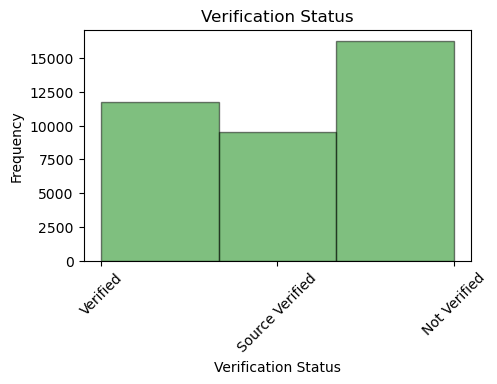

In [54]:
plt.figure(figsize=(5, 3))
plt.hist(loans01.verification_status,bins=3,edgecolor='black', alpha=0.5,color='green', label='Verification Status')
plt.xlabel('Verification Status')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Verification Status')
plt.show()

### There are a more Not-Verified borrowers than Verified or Source Verified borrowers

### lets see if that affects loan status  and interest rate

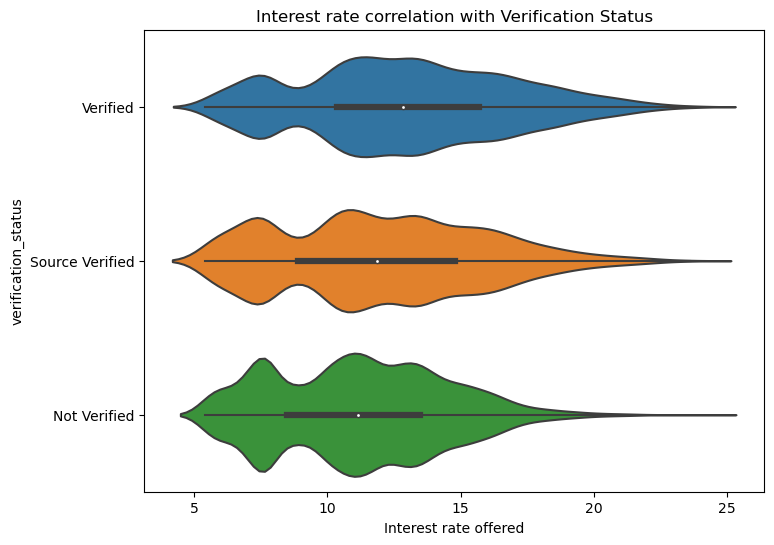

In [55]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=loans01, y='verification_status', x='int_rate')
plt.ylabel('verification_status')
plt.xlabel('Interest rate offered')
plt.title('Interest rate correlation with Verification Status')
plt.show()

### There is no proof that Not Verified Borrowers are charged more Interest

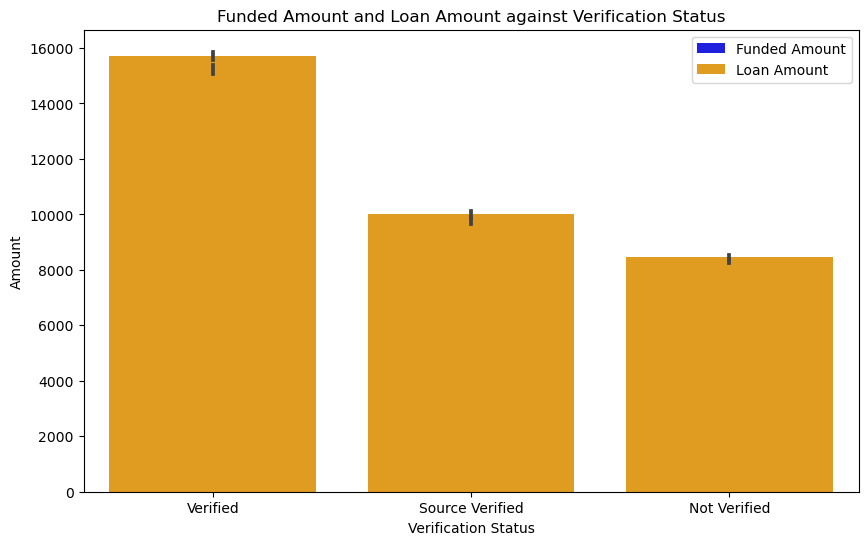

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(data=loans01, x='verification_status', y='funded_amnt', color='blue', label='Funded Amount')
sns.barplot(data=loans01, x='verification_status', y='loan_amnt', color='orange', label='Loan Amount')
plt.xlabel('Verification Status')
plt.ylabel('Amount')
plt.title('Funded Amount and Loan Amount against Verification Status')
plt.legend()
plt.show()

### There is no proof that Not-Verified users were offered lesser loan amount than they requested

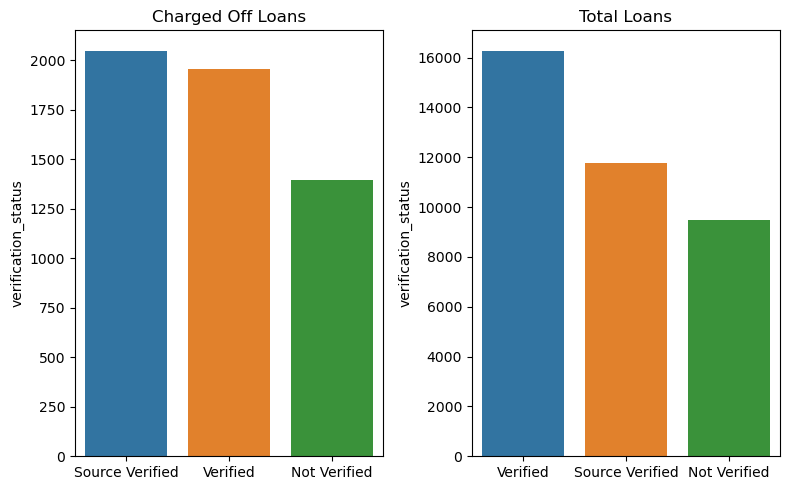

In [57]:
cat1=loans01[loans01['loan_status']== 'Charged Off']['verification_status'].unique()
val1=loans01[loans01['loan_status']== 'Charged Off']['verification_status'].value_counts()
cat2=loans01['verification_status'].unique()
val2=loans01['verification_status'].value_counts()

#print(round(((val1/val2)*100),2))

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# Plot the first bar plot
sns.barplot(x=cat1, y=val1, data=loans01, ax=axes[0])
axes[0].set_title('Charged Off Loans')

# Plot the second bar plot
sns.barplot(x=cat2, y=val2, data=loans01,errorbar='sd', ax=axes[1])
axes[1].set_title('Total Loans')
plt.tight_layout()

plt.show()

### Verified loans getting defaulted show a higher default rate at 16.8%. The Verification process is not effective at all and needs to change
### Not Verified       12.83%
### Verified           16.80%
### Source Verified    14.82%

In [58]:
print(loans01.pymnt_plan.value_counts())
#Dropping the column since it is not providing any insights
loans01.drop('pymnt_plan',axis=1, inplace=True)

n    37544
Name: pymnt_plan, dtype: int64


### Annual Income and its relation to loan Amount, interest rate and defaults

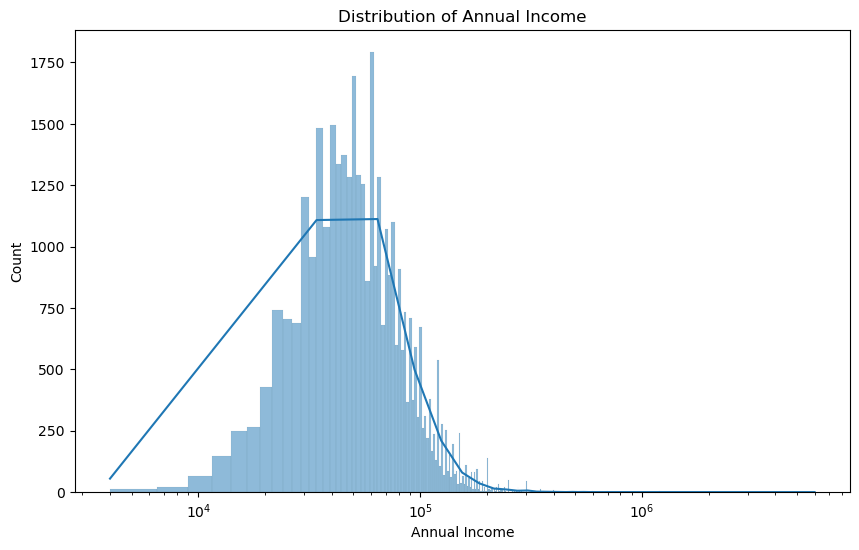

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(data=loans01, x='annual_inc', kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income')
plt.xscale('log')
plt.show()

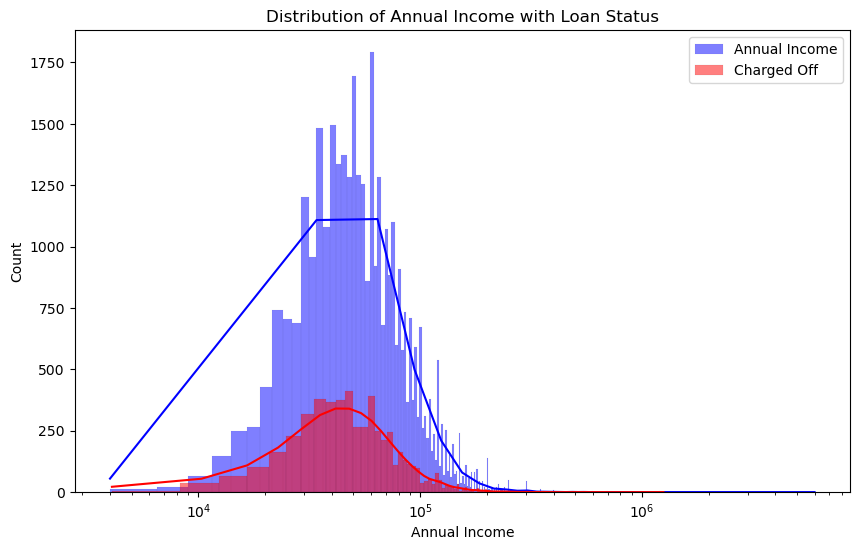

In [60]:
plt.figure(figsize=(10, 6))


sns.histplot(data=loans01, x='annual_inc', kde=True, color='blue', label='Annual Income')


sns.histplot(data=loans01[loans01['loan_status'] == 'Charged Off'], x='annual_inc', kde=True, color='red', label='Charged Off')

plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income with Loan Status')
plt.legend()
plt.xscale('log')
plt.show()

### Higher the Annual Income, lesser the default chances

#


### Analyzing Purpose for which the loan was taken.
### We can see that highest number of loans have been taken for debt consolidation followed by Credit Card

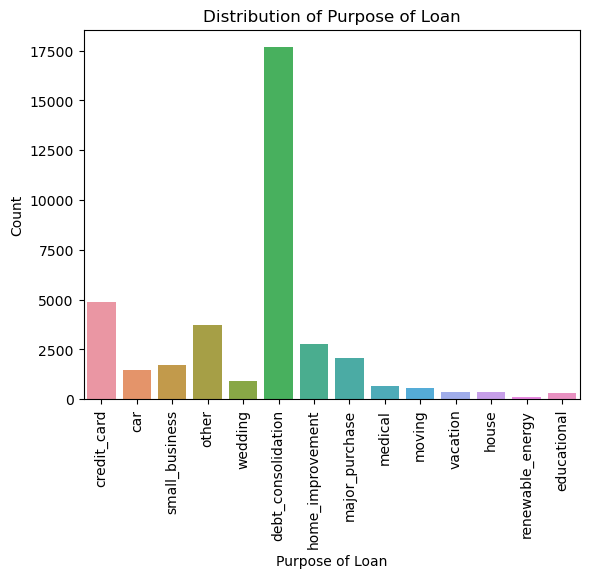

In [61]:
sns.countplot(x='purpose', data=loans01)
plt.xlabel('Purpose of Loan')
plt.ylabel('Count')
plt.title('Distribution of Purpose of Loan')
plt.xticks(rotation=90)
plt.show()

### Ratio of total loan per purpose to Charged Off per purpose

car                    0.74
credit_card            0.21
debt_consolidation     0.09
educational            5.17
home_improvement       0.43
house                  4.71
major_purchase         0.49
medical                2.35
moving                 2.76
other                  0.43
renewable_energy      20.37
small_business         1.58
vacation               4.13
wedding                1.10
Name: purpose, dtype: float64


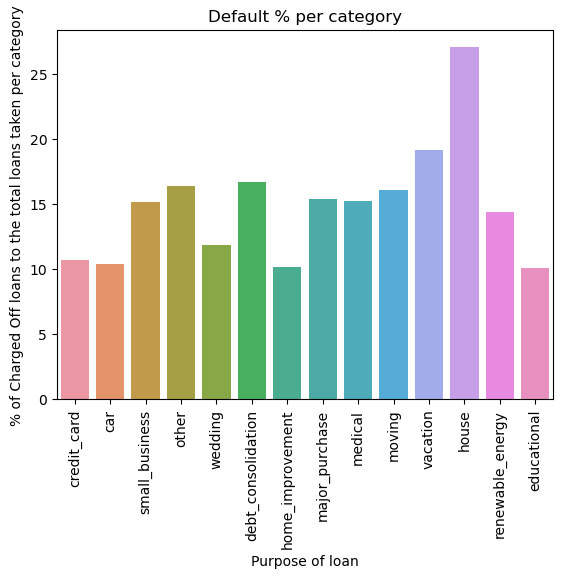

In [98]:
catt1=loans01.purpose.unique()
val1=loans01[loans01.loan_status=='Charged Off']['purpose'].value_counts()
val2=loans01.purpose.value_counts()
vall1=round(((val1/val2)*100),2)
vall2=loans01['purpose'].value_counts()
print(round(((vall1/vall2)*100),2))
sns.barplot(x=catt1, y=vall1, data=loans01,errorbar='sd')

# Set labels and title
plt.xlabel('Purpose of loan')
plt.ylabel('% of Charged Off loans to the total loans taken per category')
plt.title('Default % per category')
plt.xticks(rotation=90)
# Display the plot
plt.show()

### When a ratio is derived between total loan taken for the purpose to the amount of loan defaulted for that purpose, we see the highest default rate as Home Loans. Below are the % of defaults in each category

### car: 0.71%, credit_card: 0.21%, debt_consolidation: 0.08%, educational: 5.30%, home_improvement: 0.42%, house: 4.38%, major_purchase: 0.48%, medical: 2.29%, moving: 2.77%, other : 0.42%, renewable_energy: 18.26%,  small_business: 1.54%, vacation: 3.77%, wedding: 1.12%

#


### Analyzing whether there is any relation between Loan Status and Interest Rate

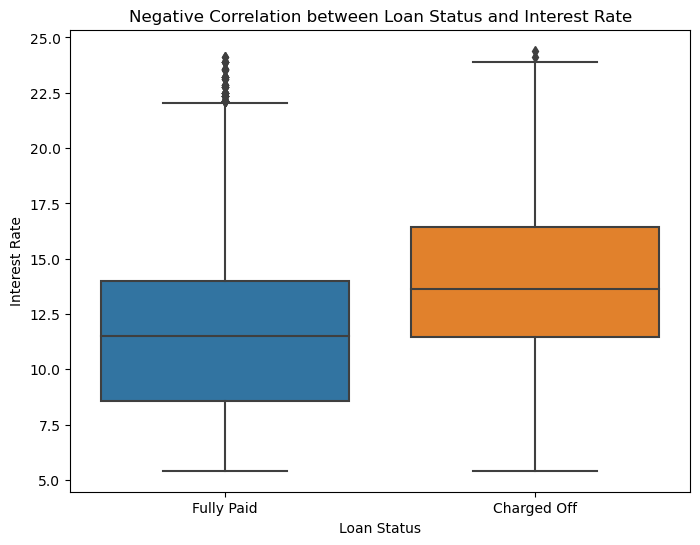

In [63]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=loans01['loan_status'], y=loans01['int_rate'], order=['Fully Paid', 'Charged Off'])

# Set labels and title
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.title('Negative Correlation between Loan Status and Interest Rate')

# Display the plot
plt.show()

### Higher the Interest rate , higher the chances of defaulting

### Verifying the relation between Loan Amount and Loan Status

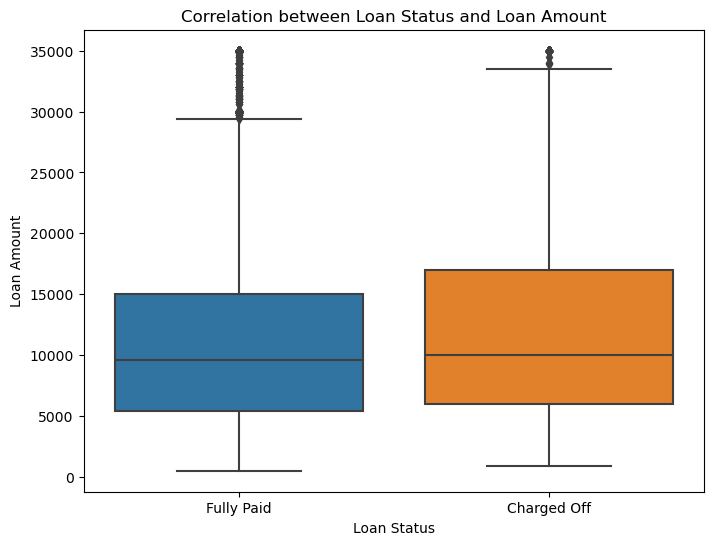

In [64]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=loans01['loan_status'], y=loans01['loan_amnt'], order=['Fully Paid', 'Charged Off'])

# Set labels and title
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Correlation between Loan Status and Loan Amount')

# Display the plot
plt.show()

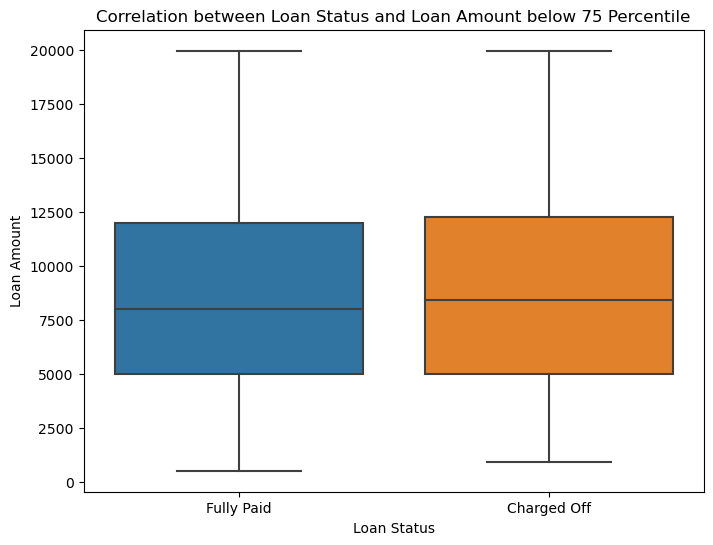

In [65]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=loans01['loan_status'], y=loans01[loans01['loan_amnt'] < 20000]['loan_amnt'], order=['Fully Paid', 'Charged Off'])

# Set labels and title
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Correlation between Loan Status and Loan Amount below 75 Percentile')

# Display the plot
plt.show()

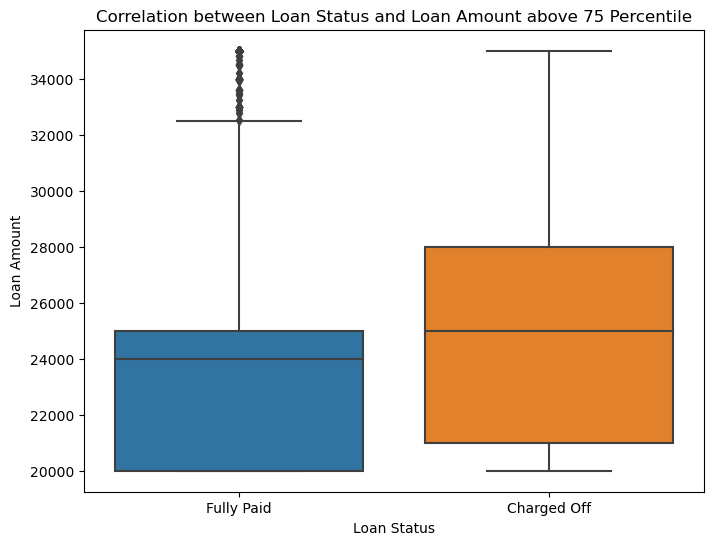

In [66]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=loans01['loan_status'], y=loans01[loans01['loan_amnt'] >= 20000]['loan_amnt'], order=['Fully Paid', 'Charged Off'])

# Set labels and title
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Correlation between Loan Status and Loan Amount above 75 Percentile')

# Display the plot
plt.show()

### The higher the loan amount the greater the chances of default

#


### Debt to Income Ratio vs Loan Status

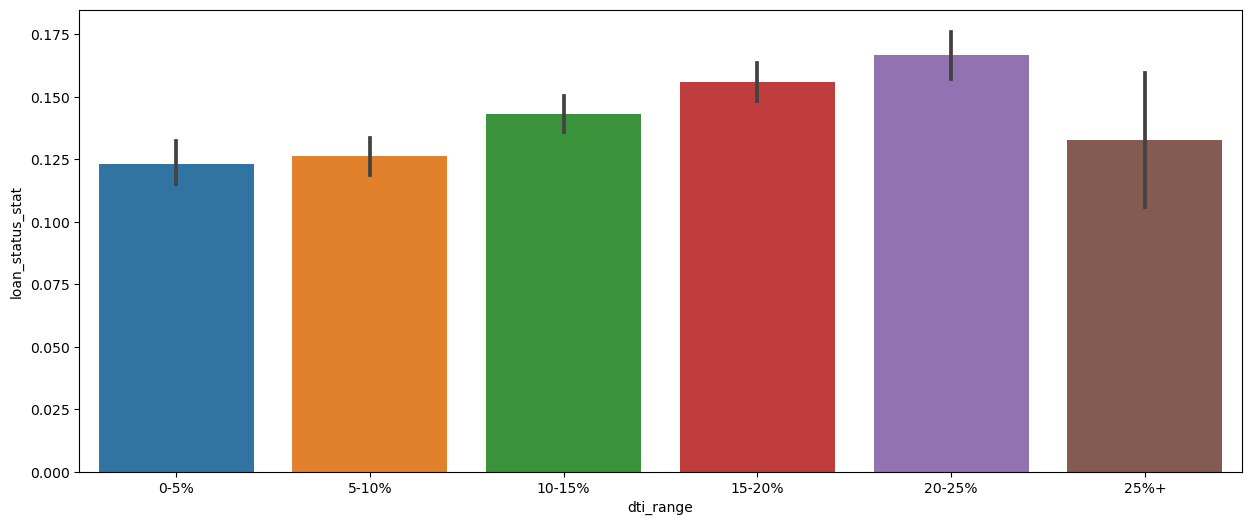

In [67]:
# Check DTI vas Defaulter

fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='dti_range', y='loan_status_stat', data=loans01)

plt.show()

### From above plot we can say that the defaulters rate is increasing as with dti_range values(except at 25+%), hence defaulter rate will depend on dti_range.

#

### revol_util vs Loan Status

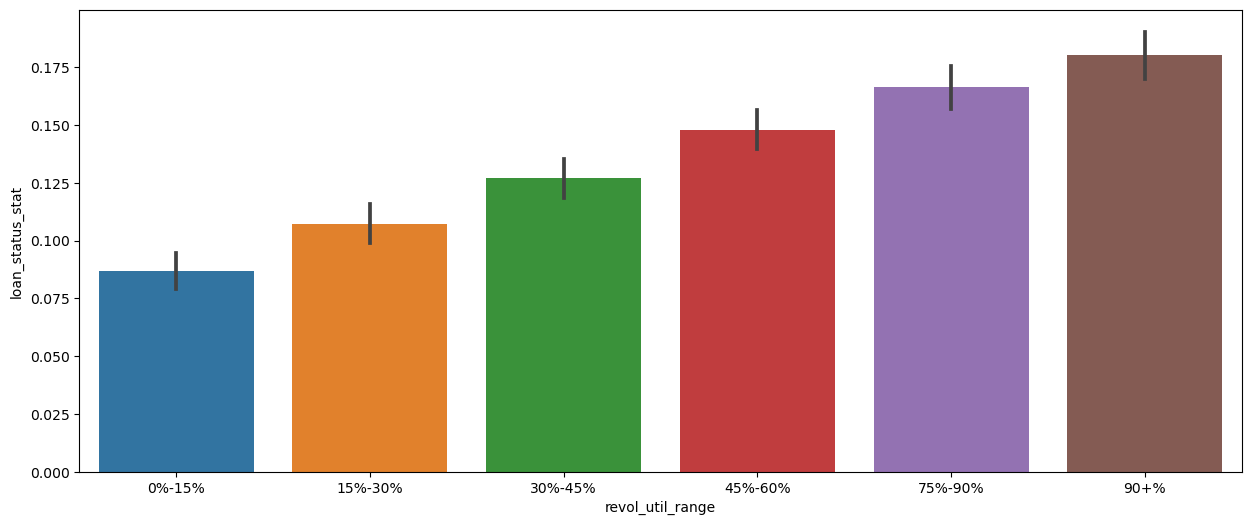

In [68]:
#Revol_util vs Defaulter

loans01['revol_util'] = loans01['revol_util'].str.replace('%','')
loans01['revol_util'] = loans01['revol_util'].astype('float')
bins = [0, 15, 30, 45, 60, 75, 90]
bucket_d = ['0%-15%', '15%-30%', '30%-45%', '45%-60%', '75%-90%', '90+%']
loans01['revol_util_range'] = pd.cut(loans01['revol_util'], bins, labels=bucket_d)

fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='revol_util_range', y='loan_status_stat', data=loans01)
#bank['revol_util'].unique()

### From above plot we can say that the defaulters rate is increasing as with revol_util, hence defaulter rate will depend on revol util.

### pub_rec vs Loan status

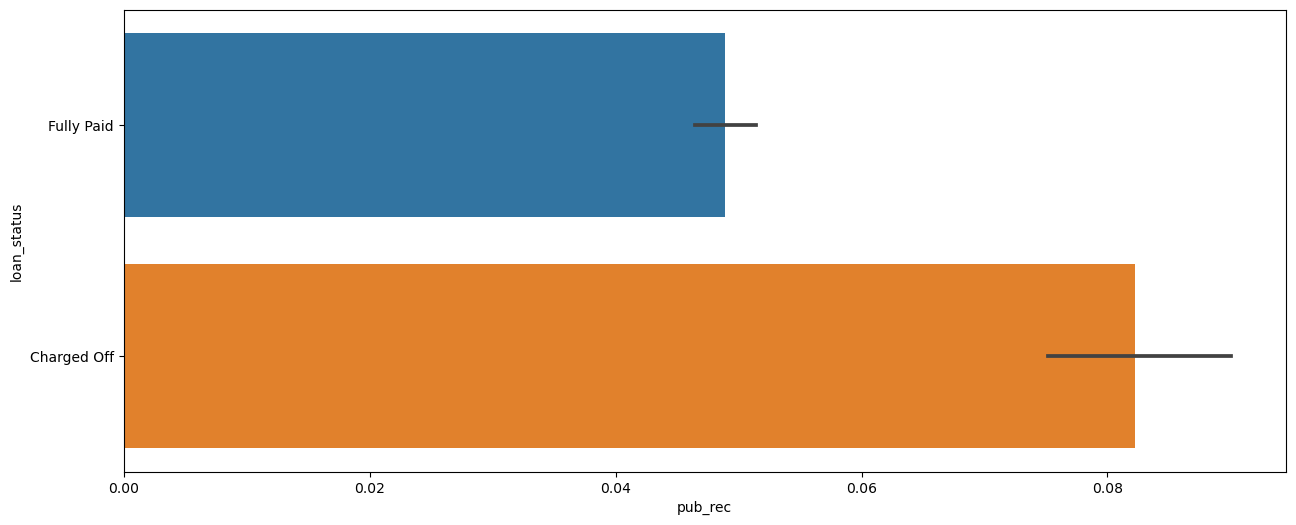

In [69]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='pub_rec', y='loan_status', data=loans01)

### It is clear that borrowers who have derogatory public records tend to default on loans

### Loan Amount and Purpose of loan vs Loan status

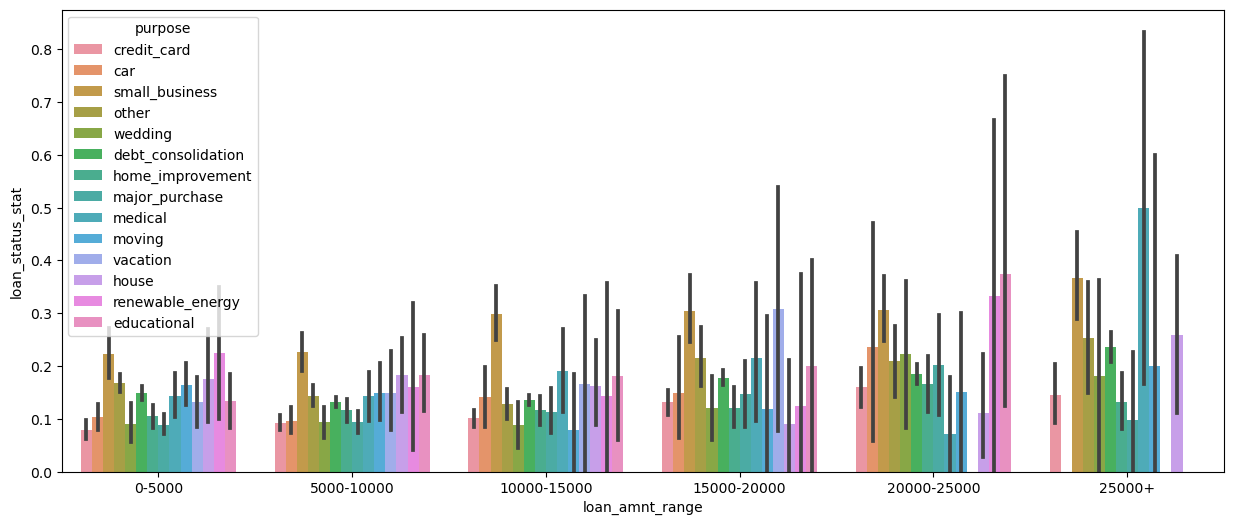

In [70]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='loan_amnt_range', y='loan_status_stat', hue = 'purpose', data=loans01)

### Defaulted Loans increase with increase in Loan Amount irrespective of the purpose barring Small Business. Small Business loans consistently stay in the High risk zone. However, for Loans above the 15000 mark, Vacation, Medical, Renewable energy are the top risky Loans

### Analysing  Annual income and  int_rate efects on Loan status

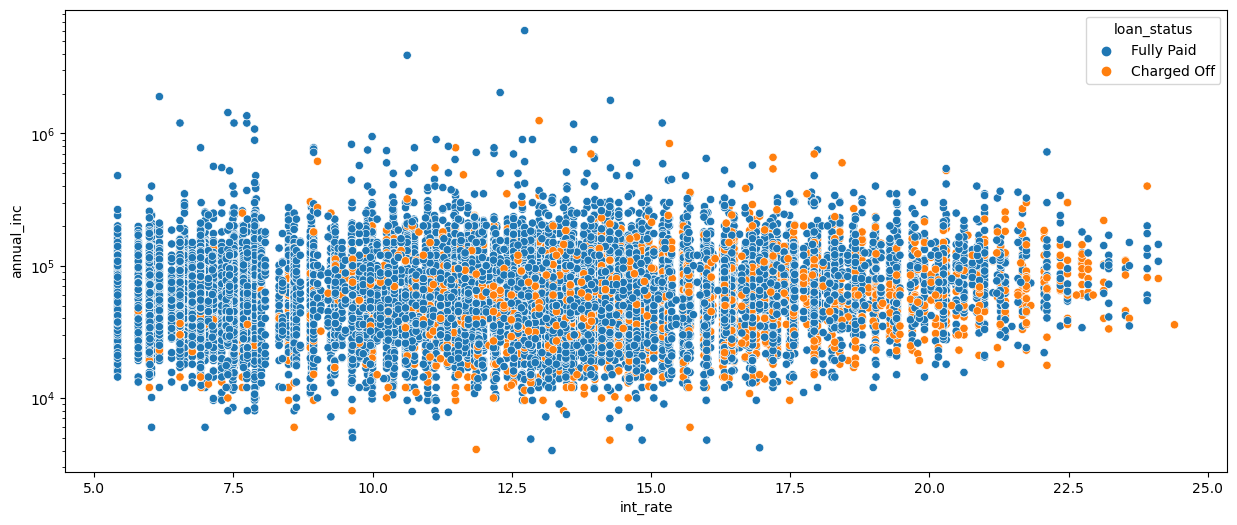

In [71]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.scatterplot(x='int_rate', y='annual_inc', hue="loan_status",data=loans01)
plt.yscale('log')
plt.show()

### Irrespective of Annual Income of the borrower, the default rate rises with rise in interest rates

## Multivariate Analysis

In [77]:
#Creating a subset of intended columns and creating the correlation matrix
loan01_sub=loans01[['loan_amnt','loan_status','term','int_rate','installment','grade','emp_length','home_ownership','annual_inc','verification_status','purpose','delinq_2yrs','dti','pub_rec_bankruptcies']]


In [78]:
#loan01_sub['loan_status'] = loans01['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)
#loan01_sub['verification_status'] = loans01['verification_status'].apply(lambda x: 1 if x in['Verified','Source Verified'] else 0)
corr_mat=loan01_sub.corr()

/var/folders/jy/3_hqzsqd1hqb8jvpkh8yjxsh0000gn/T/ipykernel_66958/142965976.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=loan01_sub.corr()


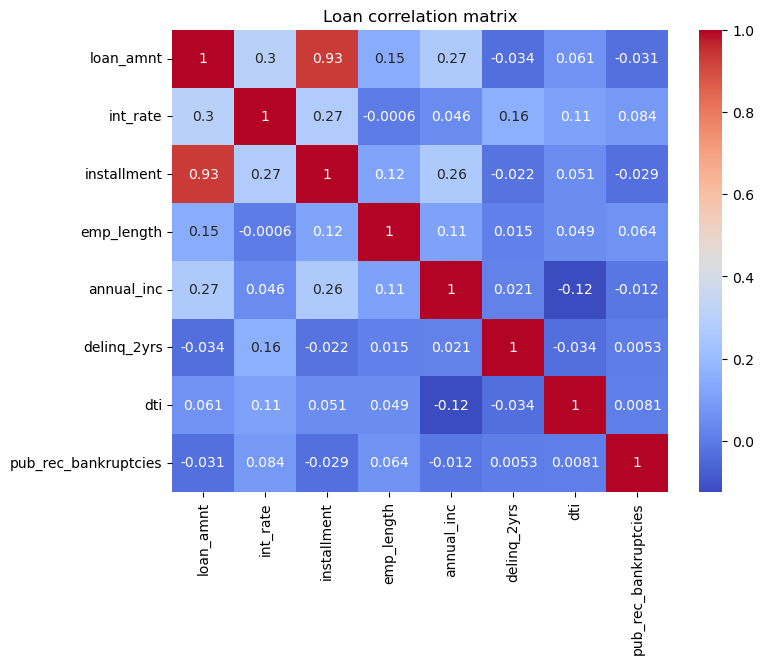

In [79]:
#Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title('Loan correlation matrix')
plt.show()

## We can see a strong inverse correlation between Loan status and Interest rate, followed by loan amount, public recorded bakruptcies, verification status, and dti